In [1]:
import pandas as pd

In [2]:

#!conda install -c anaconda xlrd --yes

file = 'https://cocl.us/datascience_survey_data'

df_data = pd.read_csv(file, index_col=0)
df_data= df_data.sort_values(by=['Very interested'],ascending=False)
print('Data downloaded and read into a dataframe!')
df_data.head()

Data downloaded and read into a dataframe!


,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [3]:

#convert each row into % of total respondent
df_data = df_data.div(df_data.sum(1), axis=0)
df_data.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.770073,0.202555,0.027372
Machine Learning,0.747248,0.218807,0.033945
Data Visualization,0.615809,0.337316,0.046875
Big Data (Spark / Hadoop),0.608775,0.333181,0.058044
Deep Learning,0.582296,0.355002,0.062702


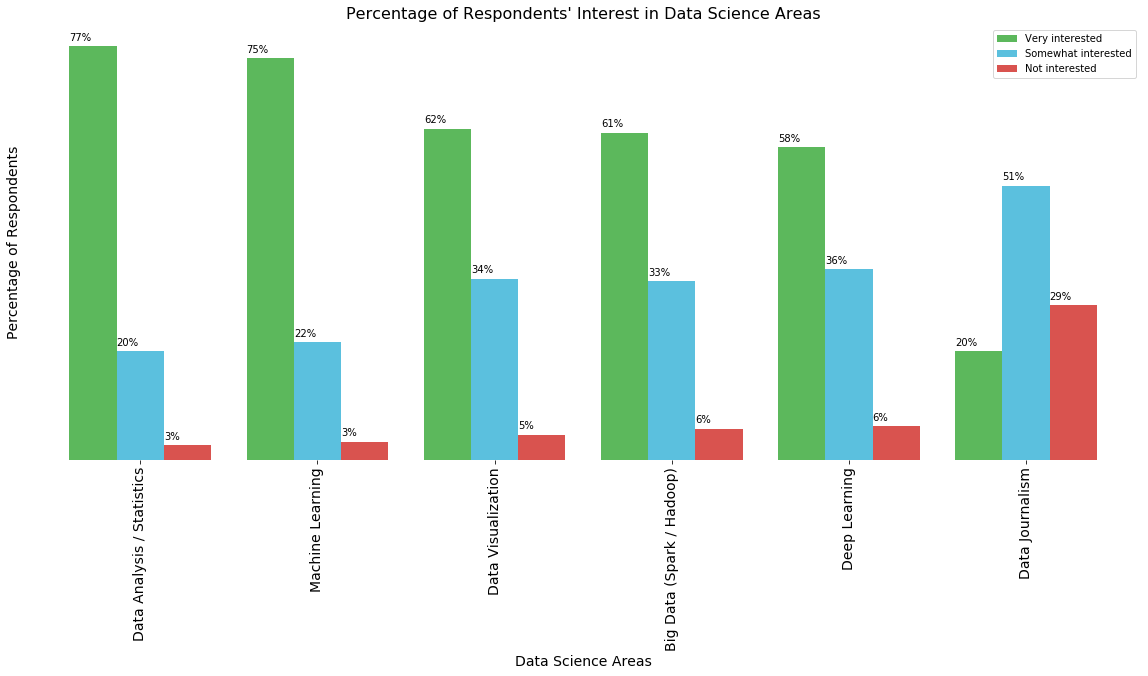

In [4]:

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
#very =(0.3607843137254902,0.7215686274509804,0.3607843137254902)
#some = (0.3568627450980392,0.7529411764705882,0.8705882352941177)
#notint=(0.8509803921568627,0.3254901960784314,0.30980392156862746)
colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax= df_data.plot(kind='bar',
             figsize=(20, 8), width = 0.8, color =colors_list, edgecolor = None # pass a tuple (x, y) size
             )

plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
plt.ylabel('Percentage of Respondents',fontsize=14)
plt.xlabel('Data Science Areas',fontsize=14)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height+0.01))
    
#to take out the bars on left, right, and up
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
    
plt.show()

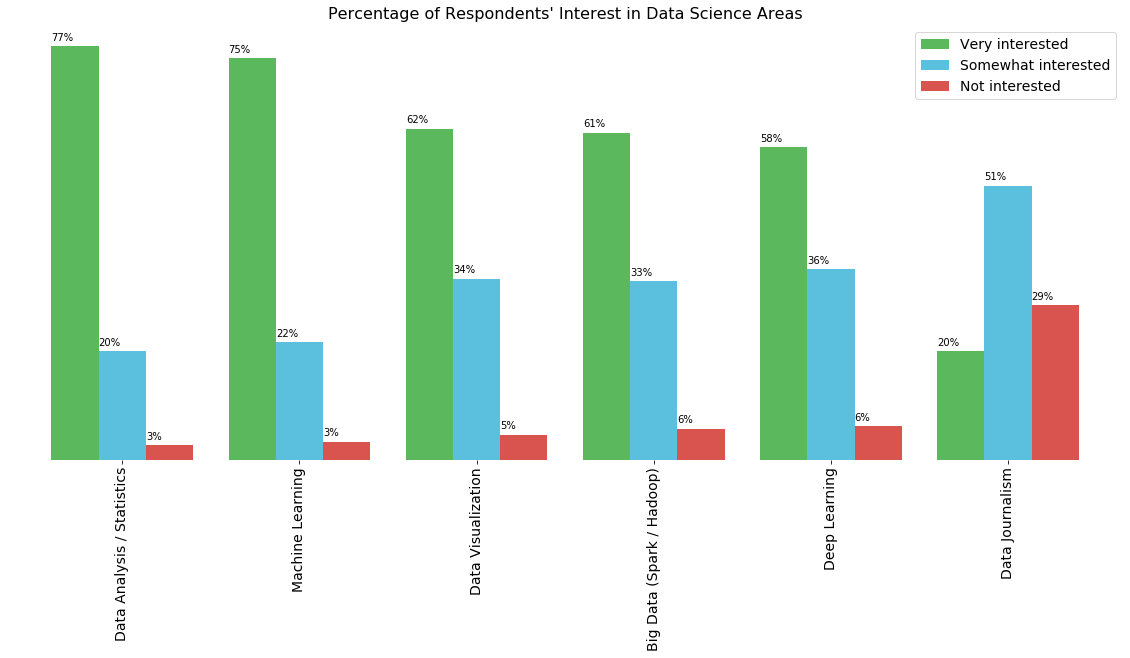

In [5]:
#solution on Stackoverflow
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values

result = df_data
ax = result.plot(kind='bar',figsize=(20,8),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=result.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

#to take out the bars on left, right, and up
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

In [6]:

import folium
import numpy as np

#print('Folium installed and imported!')

df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

df= df_incidents.groupby('PdDistrict', as_index= False).count()
new_df = df[['PdDistrict','Category']]
sf_data = new_df.rename(columns={"Category": "Count","PdDistrict":"Neighborhood"})
sf_data.head(20)

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [7]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sf_map

In [9]:

# download countries geojson file
#!wget --quiet https://cocl.us/sanfran_geojson -O sanf.json
    
#print('GeoJSON file downloaded!')
latitude = 37.77
longitude = -122.42
sf_geo = r'sanf.json'
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sf_map.choropleth(
    geo_data=sf_geo,
    data=sf_data,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name = 'Crime rate in San Fran'
)

# display map
sf_map

FileNotFoundError: [Errno 2] No such file or directory: 'sanf.json'

In [10]:
sf_geo = r'sanf.json'
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(sf_data['Count'].min(),
                              sf_data['Count'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
sf_map.choropleth(
    geo_data=sf_geo,
    data=sf_data,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime per Neighborhood in San Francisco',
    reset=True
)
sf_map

FileNotFoundError: [Errno 2] No such file or directory: 'sanf.json'